**Objective:
Predict which customers are likely to accept a personal loan offer.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(df.shape)
print(df.columns)
print(df['y'].value_counts())  # Target variable

# Check key features
df[['age', 'job', 'marital', 'education', 'y']].describe()


(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
y
no     36548
yes     4640
Name: count, dtype: int64


,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


<Axes: xlabel='age', ylabel='Count'>

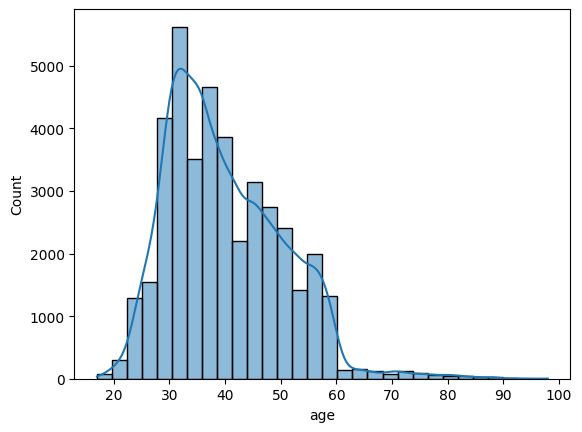

In [9]:
# Age distribution
sns.histplot(df['age'], bins=30, kde=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

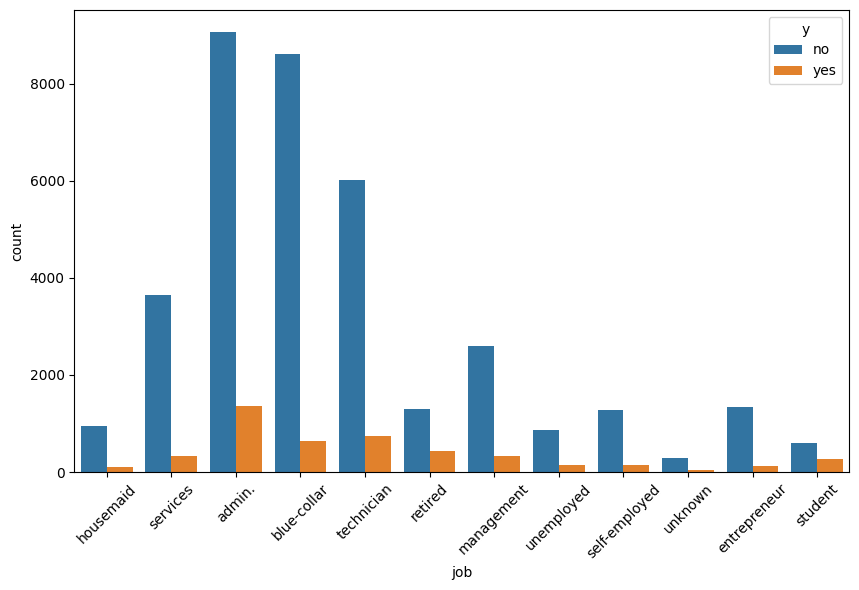

In [8]:
# Job vs Loan acceptance
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='marital', ylabel='count'>

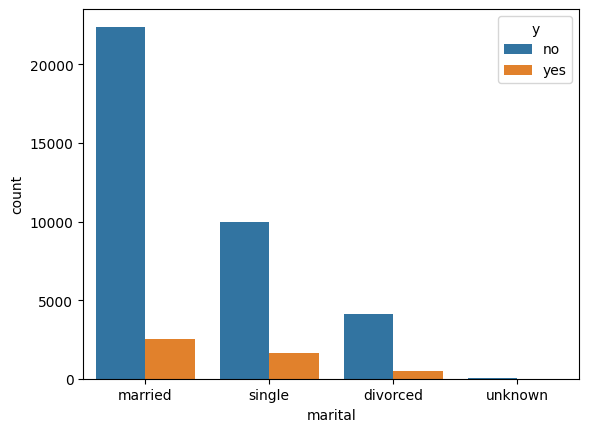

In [7]:
# Marital status vs Loan acceptance
sns.countplot(x='marital', hue='y', data=df)

In [10]:
# Encode categorical variables
df_encoded = pd.get_dummies(df.drop('duration', axis=1), drop_first=True)  # Drop 'duration' as advised in documentation

# Split features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [13]:
# Logistic Regression
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Decision Tree
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Logistic Regression:
               precision    recall  f1-score   support

       False       0.91      0.99      0.94      7303
        True       0.65      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

Confusion Matrix:
 [[7195  108]
 [ 738  197]]
Decision Tree:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7303
        True       0.61      0.23      0.34       935

    accuracy                           0.90      8238
   macro avg       0.76      0.61      0.64      8238
weighted avg       0.88      0.90      0.87      8238

Confusion Matrix:
 [[7165  138]
 [ 717  218]]


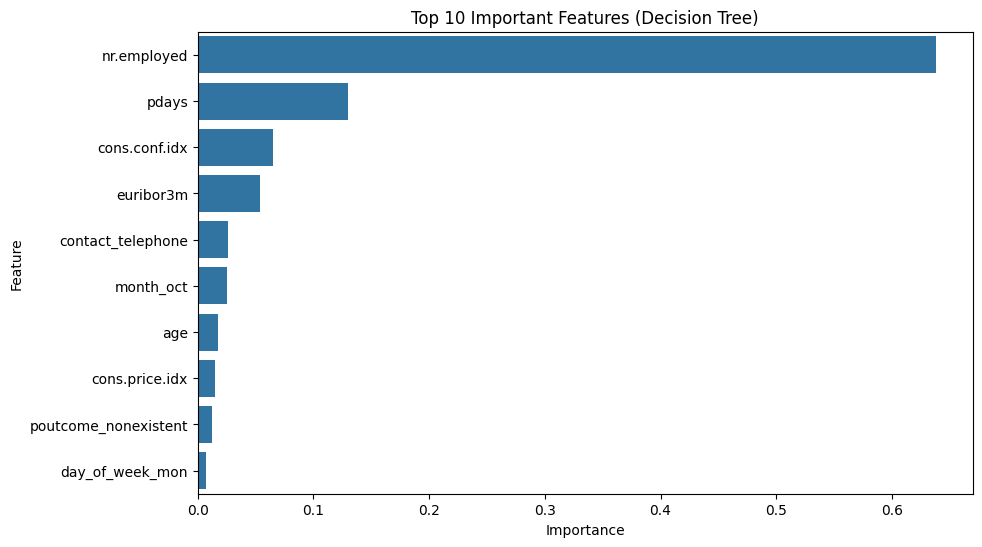

In [14]:
# Correlation heatmap or feature importance from Decision Tree
importances = tree_model.feature_importances_
feature_names = X.columns
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title('Top 10 Important Features (Decision Tree)')
plt.show()


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Train model on resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# 4. Predict on original test set
y_pred = model.predict(X_test)

# 5. Evaluate again with classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.93      0.89      0.91      7310
        True       0.34      0.44      0.39       928

    accuracy                           0.84      8238
   macro avg       0.63      0.67      0.65      8238
weighted avg       0.86      0.84      0.85      8238

[[6519  791]
 [ 516  412]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Decision Tree on resampled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[6493  817]
 [ 588  340]]
              precision    recall  f1-score   support

       False       0.92      0.89      0.90      7310
        True       0.29      0.37      0.33       928

    accuracy                           0.83      8238
   macro avg       0.61      0.63      0.61      8238
weighted avg       0.85      0.83      0.84      8238



In [18]:
DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)


DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Accuracy using score method
print("Logistic Regression Accuracy (score method):", log_model.score(X_test, y_test))

# Accuracy using accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy (score method): 0.9014323865015781
Logistic Regression Accuracy: 0.9014323865015781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Accuracy using score method
print("Decision Tree Accuracy (score method):", dt_model.score(X_test, y_test))

# Accuracy using accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy (score method): 0.8402524884680748
Decision Tree Accuracy: 0.8402524884680748
